In [3]:
%matplotlib inline
import copy
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
from operator import itemgetter

df_iris = pd.read_csv(u'iris.txt',sep=' ')

sl = np.matrix(df_iris.sl[0:]).T
sw = np.matrix(df_iris.sw[0:]).T
pl = np.matrix(df_iris.pl[0:]).T
pw = np.matrix(df_iris.pw[0:]).T
A = np.hstack((sl,sw,pl,pw))
c = np.matrix(df_iris.c[0:]).T
y = GetYForCategory(c,2)

In [5]:
def GetYForCategory(c,category):
    y = copy.copy(c)
    for i in range(len(y)):
        if y[i,0] == category :
            y[i,0] = 1
        else:
            y[i,0] = 0
    return y

def NearestIndices(A,y,k,xInd):
    x = A[xInd,:]
    mins = [(np.inf,0) for _ in range(k)] #(dist,index)
    for i in range(len(A)):
        if i == xInd:
            continue
        dist = Distance(x,A[i,:])
        if dist < mins[0][0]:
            del mins[0]
            mins.append((dist,i))
            mins = sorted(mins,key = itemgetter(0),reverse = True)
    
    return [ind for dist,ind in mins]
    
def PredictWithIndices(y,inds):
    counter = 0.0
    for i in range(len(inds)):
        counter +=  y[inds[i],0] / len(inds)
    if counter > 0.5:
        return 1
    else:
        return 0

def ResultsForK(A,y,k):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(A)):
        inds = NearestIndices(A,y,k,i)
        pred = PredictWithIndices(y,inds)
        if y[i,0] == 1:
            if pred == 1:
                tp += 1
            else:
                fn += 1
        else:
            if pred == 1:
                fp += 1 
            else:
                tn += 1
    return tp,fp,tn,fn

def PlotResultVsK():
    kVals = [i+1 for i in range(10)]
    results = np.zeros((len(kVals),4))

    for i in kVals:
        tpk,fpk,tnk,fnk = ResultsForK(A,y,i)
        results[i-1,:] = np.matrix([tpk,fpk,tnk,fnk])
    
    accuracy = (results[:,0] + results[:,2]) / len(A)
    precision = results[:,0] / (results[:,0] + results[:,1])
    recall = results[:,0] / (results[:,0] + results[:,3])

    plt.plot(kVals,accuracy,'rx-')
    plt.plot(kVals,precision,'gx-')
    plt.plot(kVals,recall,'yx-')
    plt.text(1.2,0.994,'Accuracy',color='r')
    plt.text(1.2,0.988,'Precision',color='g')
    plt.text(1.2,0.982,'Recall',color='y')
    plt.title('Category 2 Results vs K')
    plt.ylim(0.9,1)

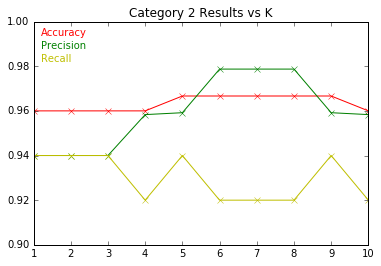

In [6]:
def Distance(x,y):
    dif = np.abs(x-y)
    return np.power(np.sum(np.power(dif,2)),1/2)

PlotResultVsK()